<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats
## Quickstart Guide

### <http://compstats.readthedocs.org>



## Installing CompStats

In [76]:
# !python -m pip uninstall CompStats

In [77]:
# %pip install -U git+https://github.com/INGEOTEC/CompStats@origin/develop
# %pip install -U "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"
# %pip install -U git+https://github.com/INGEOTEC/CompStats@develop
# %pip install -U CompStats

First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [78]:
try:
  import CompStats
except ImportError:
    %pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"

## Libraries

After installing `CompStats`, we must import the necessary libraries for our analysis. `CompStats` relies on several Python libraries for data analysis and scientific computing.

The first line of the following code loads two functions from the `CompStats` library. The `performance_multiple_metrics` function is used to calculate and analyze the performance of machine learning models for the multimetric case. On the other hand, the `plot_performance_multiple` function visualizes the performance metrics calculated by `performance_multiple_metrics`, such as accuracy or F1 score, along with confidence intervals to help understand the variability and reliability of the performance metrics.

The second line imports two functions: `difference_multiple` and `plot_difference_multiple`; `difference_multiple` assesses the differences in performance between models in comparison to the best system for each metric, and `plot_difference_multiple` visually represents these differences relative to the best system.

The third line imports two functions: `all_differences` and `difference_p_value`. `all_differences` evaluates the differences in performance between all models, and `difference_p_value` estimates the p-value of the hypothesis that the difference is significantly greater than zero.

The fourth line imports the function `multipletests`that is used for adjusting p-values when multiple hypothesis tests are performed, to control for the false discovery rate or family-wise error rate.

The rest of the lines load commonly used Python libraries.

In [79]:
from CompStats import performance_multiple_metrics, plot_performance_multiple
from CompStats import difference_multiple, plot_difference_multiple
from CompStats import all_differences_multiple
from CompStats import difference_p_value
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, precision_score
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# la siguiente línea es para cargar el modulo measurements para calcular el CI 
from CompStats import measurements

# Dataset

Once we have set up our environment, we can explore what CompStats offers. Let's begin with a basic example of how to use CompStats for a simple statistical analysis.

To illustrate the use of CompStats, we will use a dataset included in the CompStats package. The path of the dataset is found with the following instructions. The variable `DATA` contains the path as shown below.  

In [80]:
# from CompStats.tests.test_performance import DATA
import os
# DATA = "C:\\Users\\Sergio Nava\\Documentos\\GitHub\\INGEOTEC\\CompStats\\CompStats\\tests\\data.csv"
#DATA = '/Users/nava/Documents/GitHub/DCCD/CompStats/CompStats/tests/data.csv'


`DATA` contains the information to compare six systems for a multiclass classification task. The next instruction loads the data into a dataframe.

In [81]:
DATA = 'detoxis_subtask1'
metrics = [
    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
    ]
#DATA = 'exist_task1_en_l'
#metrics = [
#    {"func": accuracy_score,  'BiB': True}
#    ]
#DATA = 'MeOffendEs_subtask3'
#metrics = [
#    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
#    ]
#DATA = 'RES-MEX2021_recomendation'
#metrics = [
#    {"func": mean_absolute_error,  'BiB': False}
#    ]
#DATA = 'PARMEX_2022'
#metrics = [
#    {"func": f1_score, "args": {"average": "binary"}, 'BiB': True}
#    ]
df = pd.read_csv(DATA+'.csv')
print(df.head())

perf = performance_multiple_metrics(df, "y", metrics,num_samples=1000)

   y  address  AIUPV  alejandromosquera  Benlloch  Calabacinescosmicos  \
0  0        1      0                  0         0                    1   
1  1        0      0                  1         0                    1   
2  0        1      1                  0         0                    0   
3  0        1      1                  0         0                    0   
4  1        0      1                  1         0                    0   

   CarlesyJorge  Datacism  DCG  Dembo  ...  LlunaPerezJuliaGregori  \
0             1         0    0      0  ...                       0   
1             0         0    0      0  ...                       1   
2             0         0    1      1  ...                       0   
3             0         0    1      1  ...                       1   
4             0         0    1      0  ...                       1   

   LNRInigoPicasarriJoanCastillo  LNRSaraSotoClaraSalelles  maia  NEON2  \
0                              0                         0 

In [82]:
import pickle

# Suponiendo que tienes un objeto "perf"
#perf = {"nombre": "Ejemplo", "valor": 10}

#print(perf)
# Almacenar el objeto en un archivo
with open(DATA+".dat", "wb") as archivo:
    pickle.dump(perf, archivo)

# Recuperar el objeto del archivo
with open(DATA+".dat", "rb") as archivo:
    perf_recuperado = pickle.load(archivo)

#print(perf_recuperado)

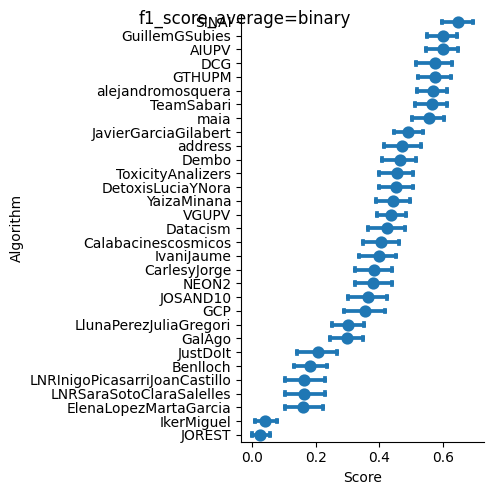

In [83]:
face_grid = plot_performance_multiple(perf_recuperado)

In [84]:
diff = difference_multiple(perf) 

In [85]:
for metric, diffs in diff['winner'].items():
    print(f"For {metric} the best performing system is {diffs['best']}")

For f1_score_average=binary the best performing system is SINAI


In [86]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['CI'].items():
        print(f"CI for {key} {value}")



For the metric f1_score_average=binary the best is SINAI
CI for address (0.11194178336282205, 0.2390876678842016)
CI for AIUPV (0.002340194363219378, 0.09245500652855032)
CI for alejandromosquera (0.0321436388937534, 0.13184045640761582)
CI for Benlloch (0.3869911089892843, 0.538685005267077)
CI for Calabacinescosmicos (0.1812168296341803, 0.3056458133683845)
CI for CarlesyJorge (0.1970818502039303, 0.33134885074782483)
CI for Datacism (0.16185279314217904, 0.2873374163077498)
CI for DCG (0.025170476969719434, 0.12278145178314098)
CI for Dembo (0.12564882326975357, 0.24028376151351907)
CI for DetoxisLuciaYNora (0.1358189010145669, 0.2525437519328329)
CI for ElenaLopezMartaGarcia (0.41488847855046257, 0.5529244761047236)
CI for GalAgo (0.27947068752586807, 0.4185445722742463)
CI for GCP (0.22841629263965393, 0.36110851486661044)
CI for GTHUPM (0.02547413667036363, 0.12100172050127103)
CI for GuillemGSubies (0.0070302159719592945, 0.08842911976367865)
CI for IkerMiguel (0.54725949016672

metric_name  : f1_score_average=binary
BiB: True


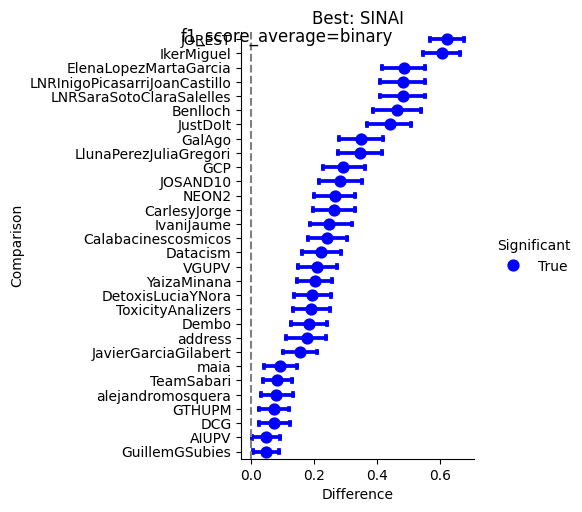

In [87]:
face_grid_diff = plot_difference_multiple(diff)

In [88]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference with {key} {value}")


For the metric f1_score_average=binary the best is SINAI
p-value for the difference with address 0.0
p-value for the difference with AIUPV 0.021
p-value for the difference with alejandromosquera 0.0
p-value for the difference with Benlloch 0.0
p-value for the difference with Calabacinescosmicos 0.0
p-value for the difference with CarlesyJorge 0.0
p-value for the difference with Datacism 0.0
p-value for the difference with DCG 0.002
p-value for the difference with Dembo 0.0
p-value for the difference with DetoxisLuciaYNora 0.0
p-value for the difference with ElenaLopezMartaGarcia 0.0
p-value for the difference with GalAgo 0.0
p-value for the difference with GCP 0.0
p-value for the difference with GTHUPM 0.001
p-value for the difference with GuillemGSubies 0.011
p-value for the difference with IkerMiguel 0.0
p-value for the difference with IvaniJaume 0.0
p-value for the difference with JavierGarciaGilabert 0.0
p-value for the difference with JOREST 0.0
p-value for the difference with JO

In [89]:
correction = 'bonferroni'
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')


For the metric f1_score_average=binary the best is SINAI
address, p-value corrected by bonferroni = 0.0
AIUPV, p-value corrected by bonferroni = 0.63
alejandromosquera, p-value corrected by bonferroni = 0.0
Benlloch, p-value corrected by bonferroni = 0.0
Calabacinescosmicos, p-value corrected by bonferroni = 0.0
CarlesyJorge, p-value corrected by bonferroni = 0.0
Datacism, p-value corrected by bonferroni = 0.0
DCG, p-value corrected by bonferroni = 0.06
Dembo, p-value corrected by bonferroni = 0.0
DetoxisLuciaYNora, p-value corrected by bonferroni = 0.0
ElenaLopezMartaGarcia, p-value corrected by bonferroni = 0.0
GalAgo, p-value corrected by bonferroni = 0.0
GCP, p-value corrected by bonferroni = 0.0
GTHUPM, p-value corrected by bonferroni = 0.03
GuillemGSubies, p-value corrected by bonferroni = 0.32999999999999996
IkerMiguel, p-value corrected by bonferroni = 0.0
IvaniJaume, p-value corrected by bonferroni = 0.0
JavierGarciaGilabert, p-value corrected by bonferroni = 0.0
JOREST, p-va

In [90]:
all_diff = all_differences_multiple(perf)


In [91]:
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric} ")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference {key} {value}")


For the metric f1_score_average=binary 
p-value for the difference SINAI vs GuillemGSubies 0.011
p-value for the difference SINAI vs AIUPV 0.021
p-value for the difference SINAI vs DCG 0.002
p-value for the difference SINAI vs GTHUPM 0.001
p-value for the difference SINAI vs alejandromosquera 0.0
p-value for the difference SINAI vs TeamSabari 0.001
p-value for the difference SINAI vs maia 0.001
p-value for the difference SINAI vs JavierGarciaGilabert 0.0
p-value for the difference SINAI vs address 0.0
p-value for the difference SINAI vs Dembo 0.0
p-value for the difference SINAI vs ToxicityAnalizers 0.0
p-value for the difference SINAI vs DetoxisLuciaYNora 0.0
p-value for the difference SINAI vs YaizaMinana 0.0
p-value for the difference SINAI vs VGUPV 0.0
p-value for the difference SINAI vs Datacism 0.0
p-value for the difference SINAI vs Calabacinescosmicos 0.0
p-value for the difference SINAI vs IvaniJaume 0.0
p-value for the difference SINAI vs CarlesyJorge 0.0
p-value for the dif

In [92]:
correction = 'bonferroni'
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')


For the metric f1_score_average=binary
SINAI vs GuillemGSubies, p-value corrected by bonferroni = 1.0
SINAI vs AIUPV, p-value corrected by bonferroni = 1.0
SINAI vs DCG, p-value corrected by bonferroni = 0.93
SINAI vs GTHUPM, p-value corrected by bonferroni = 0.465
SINAI vs alejandromosquera, p-value corrected by bonferroni = 0.0
SINAI vs TeamSabari, p-value corrected by bonferroni = 0.465
SINAI vs maia, p-value corrected by bonferroni = 0.465
SINAI vs JavierGarciaGilabert, p-value corrected by bonferroni = 0.0
SINAI vs address, p-value corrected by bonferroni = 0.0
SINAI vs Dembo, p-value corrected by bonferroni = 0.0
SINAI vs ToxicityAnalizers, p-value corrected by bonferroni = 0.0
SINAI vs DetoxisLuciaYNora, p-value corrected by bonferroni = 0.0
SINAI vs YaizaMinana, p-value corrected by bonferroni = 0.0
SINAI vs VGUPV, p-value corrected by bonferroni = 0.0
SINAI vs Datacism, p-value corrected by bonferroni = 0.0
SINAI vs Calabacinescosmicos, p-value corrected by bonferroni = 0.0
S